In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import statsmodels.api as sm



# Carica il dataset
file="C:\\Users\\TommasoFrancescoSanv\\OneDrive - ITS Angelo Rizzoli\\Desktop\\housing_data_italy_august2022_updated.csv"
df = pd.read_csv(file)


# encoding
df = df.dropna().reset_index(drop=True)
encoder=OneHotEncoder(sparse_output=False)
encoded_energy_class=encoder.fit_transform(df["energy_class"].unique().reshape(-1,1))
df= df.drop(columns=["title","availability","status","timestamp", "heating", "location", "energy_class"])
energy_class_df=pd.DataFrame(encoded_energy_class,columns=encoder.get_feature_names_out(['energy_class'])).fillna(0)

# Visualizza info iniziali
print("Colonne disponibili:", df.columns)

#Scelta della feature
#normalizzazione dei dati
target_col = 'price'
X = df.drop(columns=[target_col])
scaler=MinMaxScaler()
scaledX=scaler.fit_transform(X.values)
y = df[target_col]
print(scaledX)

# Divisione train-test
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

print("\n Regressione Lineare ")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R2 Score:", r2_score(y_test, y_pred_lin))






Colonne disponibili: Index(['price', 'n_rooms', 'floor', 'mq', 'n_bathrooms',
       'year_of_construction', 'has_garage', 'has_terrace', 'has_garden',
       'has_balcony', 'has_fireplace', 'has_alarm', 'has_air_conditioning',
       'has_pool', 'has_parking', 'has_elevator', 'is_furnished', 'latitude',
       'longitude'],
      dtype='object')
[[1.         0.01960784 0.12324649 ... 1.         0.33062649 0.81337895]
 [0.66666667 0.03921569 0.12625251 ... 0.         0.33062649 0.81337895]
 [0.         0.03921569 0.04408818 ... 0.         0.1898743  0.71280736]
 ...
 [0.66666667 0.         0.18937876 ... 0.         0.48854457 0.8617238 ]
 [0.33333333 0.         0.07915832 ... 0.         0.48854457 0.8617238 ]
 [0.33333333 0.05882353 0.11022044 ... 0.         0.48854457 0.8617238 ]]

 Regressione Lineare 
MSE: 85899561625.2647
R2 Score: 0.04415123659571896


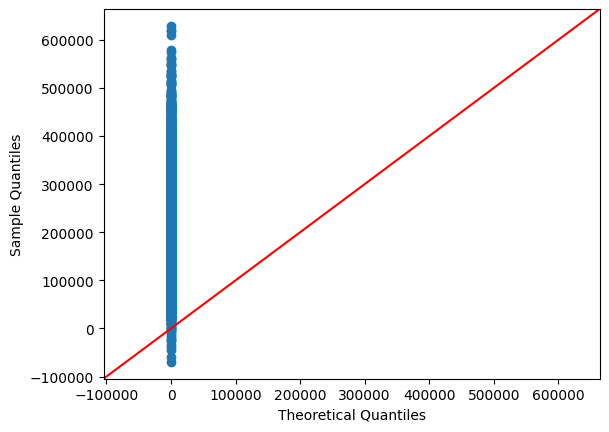

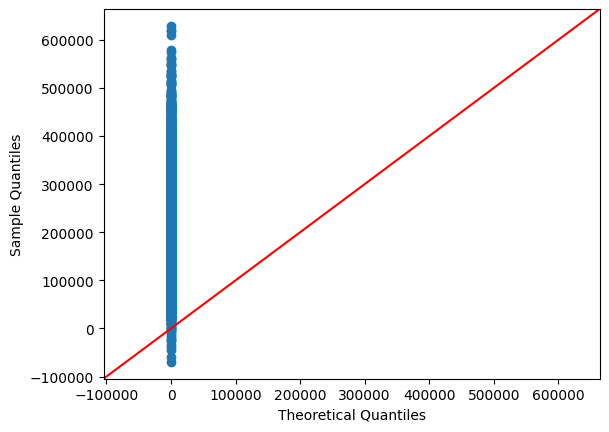

In [17]:
sm.qqplot(y_pred_lin,line="45")

In [2]:
file="C:\\Users\\TommasoFrancescoSanv\\OneDrive - ITS Angelo Rizzoli\\Desktop\\housing_data_italy_august2022_updated.csv"
df = pd.read_csv(file)
low = np.nanpercentile(df['price'],33)
high = np.nanpercentile(df['price'],66)

#eliminazione dei valori nulli
#eliminazione delle colonne non necessarie
#definizione del range di prezzo
df = df.dropna()
df= df.drop(columns=["title","availability","status","timestamp", "heating", "location", "energy_class"])
df["price"]=["low" if p < low else "high" if p > high else "medium" for p in df["price"]]
print(df["price"])

#normalizzazione dei dati
X = df.drop(columns=[target_col])
scaler=MinMaxScaler()
scaledX=scaler.fit_transform(X.values)
y = df[target_col]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("risultato della random forest")
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
y_pred_lin = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lin))


10           low
13           low
15           low
16        medium
17           low
           ...  
223402      high
223404    medium
223405    medium
223406      high
223408      high
Name: price, Length: 92100, dtype: object
risultato della random forest
Accuracy: 0.601357220412595
